# Test functionality for the default case

In [1]:
import sys
sys.path.append('../../')

import matplotlib.pyplot as plt
#plt.style.use('ggplot')
#import numpy as np

In [2]:
%matplotlib notebook

In [3]:
import pyspctral2 as psp2
print(psp2.model.__doc__.strip())

Wrapper for the SPCTRAL2 model (C version).
    
    Note that there are no runtime options in the original model,
    so we compile every time (not very efficient...)
    but luckily it takes very little time to run. 

    Initialization parameters
    -----------------------------
    tau500 : float
        aerosol optical depth at 0.5 um (500 nm), base e
        set to 0.0 to ignore (-1.0 to silently fail with warning in output file...)
        default value (from original C example run script) = 0.2, from Excel version = 0.27 (midrange)
        typical range [0.05, 0.55] for clear sky
    watvap : float
        column precipitable water vapor (cm)
        set to 0.0 to ignore (-1.0 to silently fail with warning in output file...)
        default value (from original C example run script) = 1.36, from Excel version = 1.42
        typical range [0.3, 6]
    ozone : float
        total column ozone (cm)
        set to -1.0 for an internal (SPCTRAL2) estimation based on lat/lon and tim

## Examine case params and then run

In [4]:
m = psp2.model()  # no args => default settings (based on those found in the original C run program)
#m = psp2.model(tau500=0.4, watvap=2.0, ozone=-1.0)
print('lat, lon:', m.lat, m.lon)
print('datetime:', m.dt)
print('temp, press:', m.temp, m.press)
print('tau500, watvap, ozone:', m.tau500, m.watvap, m.ozone)

lat, lon: 40.0 -105.0
datetime: 2014-07-01 12:00:00
temp, press: 27 1010
tau500, watvap, ozone: 0.27 1.42 -1.0


In [5]:
m.run()

## Test provided plotting routine

<IPython.core.display.Javascript object>


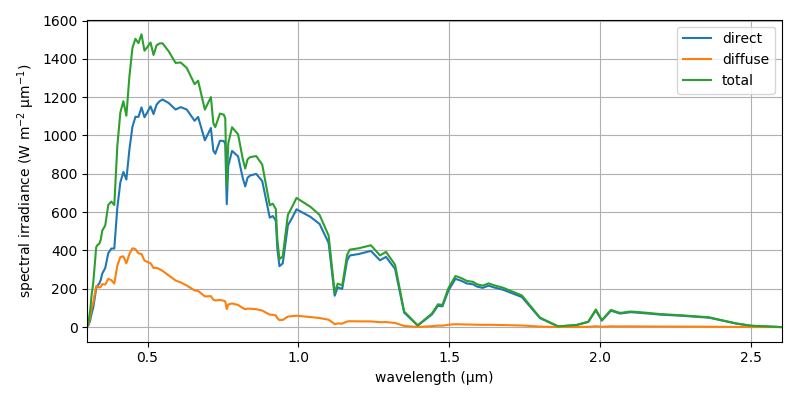

In [6]:
psp2.plot_spectrum();  # plots and returns handle so `;` to silence returned one in the Notebook

## Test spectrum correction by ground-based measurement

<IPython.core.display.Javascript object>


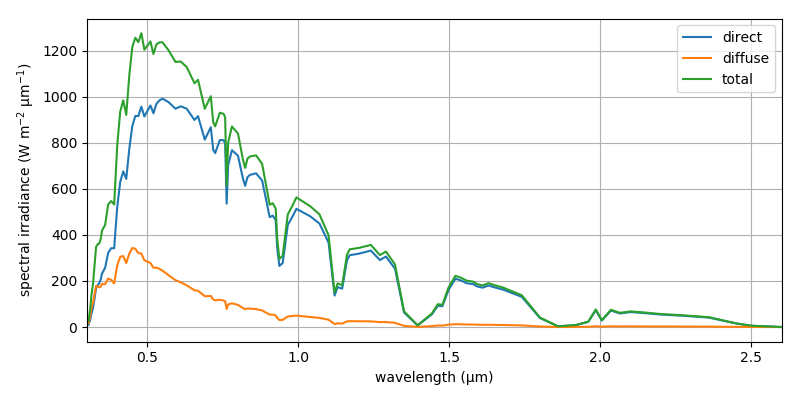

In [7]:
measured_val = 350  # W/m^2
measured_units = 'E'
measured_bnds = (0.4, 0.7)  # PAR/Vis band (um)

m.correct(measured_units=measured_units, 
          measured_val=measured_val, 
          measured_bnds=measured_bnds)

psp2.plot_spectrum(output_type='corrected');